# AR6 WG1 - SPM.8

This notebook reproduces parts of **Figure SPM.8** of the IPCC's *Working Group I contribution to the Sixth Assessment Report* ([AR6 WG1](https://www.ipcc.ch/assessment-report/ar6/)).

The data supporting the SPM figure is published under a Creative Commons CC-BY license at 
the [Centre for Environmental Data Analyis (CEDA)](https://catalogue.ceda.ac.uk/uuid/ae4f1eb6fce24adcb92ddca1a7838a5c).

This notebook uses a version of that data which was processed for interoperability with the format used by IPCC WG3, the so-called IAMC format.  
The notebook is available under an open-source [BSD-3 License](https://github.com/openscm/AR6-WG1-Data-Compilation/blob/main/LICENSE) in the [openscm/AR6-WG1-Data-Compilation](https://github.com/openscm/AR6-WG1-Data-Compilation) GitHub repository.

The notebook uses the Python package [pyam](https://pyam-iamc.readthedocs.io), which provides a suite of features and methods for the analysis, validation and visualization of reference data and scenario results
generated by integrated assessment models, macro-energy tools and other frameworks
in the domain of energy transition, climate change mitigation and sustainable development.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pyam
import utils

<IPython.core.display.Javascript object>

In [2]:
rc = pyam.run_control()
rc.update("plotting.yaml")

## Import and inspect the scenario data

The processed time format for SPM 8 has two columns that are not standard IAMC/pyam columns *reference_period_end_year* and *reference_period_start_year* for advanced features with **smcdata**.

To work with the data in pyam, we first import the data as a **pandas.DataFrame**.<br />
Then, we remove these columns and cast the data as a [pyam.IamDataFrame](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html).

In [3]:
data = pd.read_csv(utils.DATA_DIR / "processed" / "fig-spm8" / "fig-spm8-timeseries.csv")
data.drop(columns=["reference_period_end_year", "reference_period_start_year"], inplace=True)

df = pyam.IamDataFrame(data)
df

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : CMIP6 multi-model ensemble, Ch.4 Assessed (2)
 * scenario : SSP1-1.9, SSP1-2.6, SSP2-4.5, SSP3-7.0, SSP5-8.5, historical (6)
Timeseries data coordinates:
   region   : World (1)
   variable : Arctic Sea Icea Area|September|5%, ... (9)
   unit     : K, Mm^2, dimensionless (3)
   year     : 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, ... 2099 (150)
Meta indicators:
   exclude (bool) False (1)

## Create a simple plot for surface air temperature change (Panel a)

We use [matplotlib](https://matplotlib.org) and
the [pyam plotting module](https://pyam-iamc.readthedocs.io/en/stable/gallery/index.html)
to create a figure composed of several elements (the mean and the ranges).

The pyam-plotting feature `final_ranges` allows to highlight the ranges of temperature outcome by scenario
at the end of the century ([read the docs](https://pyam-iamc.readthedocs.io/en/stable/api/plotting.html#pyam.plotting.line)).

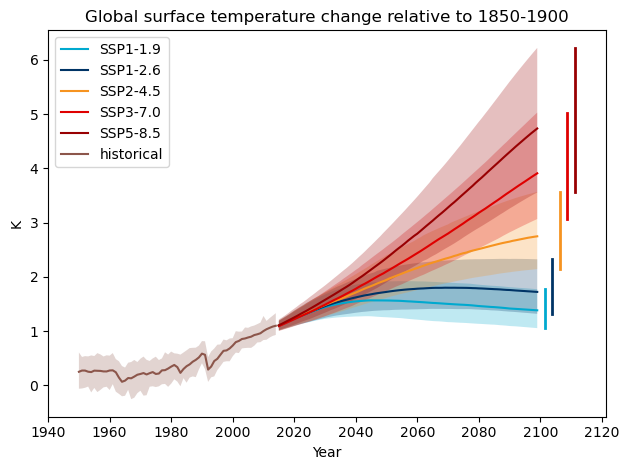

In [4]:
fig, ax = plt.subplots()

# Compile the variables to be used for this figure
variable = "Surface Air Temperature Change"
mean = f"{variable}|Mean"
ranges = [f"{variable}|{quant}" for quant in ["5%", "95%"]]

# Plot the data
df.filter(variable=mean).plot(ax=ax, color="scenario")
df.filter(variable=ranges).plot(ax=ax, color="scenario", alpha=0, fill_between=True, final_ranges=True)

# Clean and show the plot
ax.set_title("Global surface temperature change relative to 1850-1900")
plt.tight_layout()
fig